# **IRIS Flower Prediction using Non-Linear SVM**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> **1. Data Pre-processing :**

In [12]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['species'] = df['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [18]:
# Select X and y without feature_names

X = df[['sepal_length','petal_width']].values  # Select the first two features for visualization purposes
y = df.species

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

> **2. Create and Train the SVM Model :**

In [20]:
from sklearn.svm import SVC

In [21]:
svm_clf = SVC(kernel='poly',degree=5, random_state=42)
svm_clf.fit(x_train, y_train)

SVC(degree=5, kernel='poly', random_state=42)

> **3. Predict the Test Set Results :**

In [22]:
y_pred = svm_clf.predict(x_test)

> **4. Evaluate the Model Performance :**

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [25]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


> **5. Visualize the Results :**

In [27]:
# Define Grid for Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [28]:
# Make Predictions on Mesh Grid

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

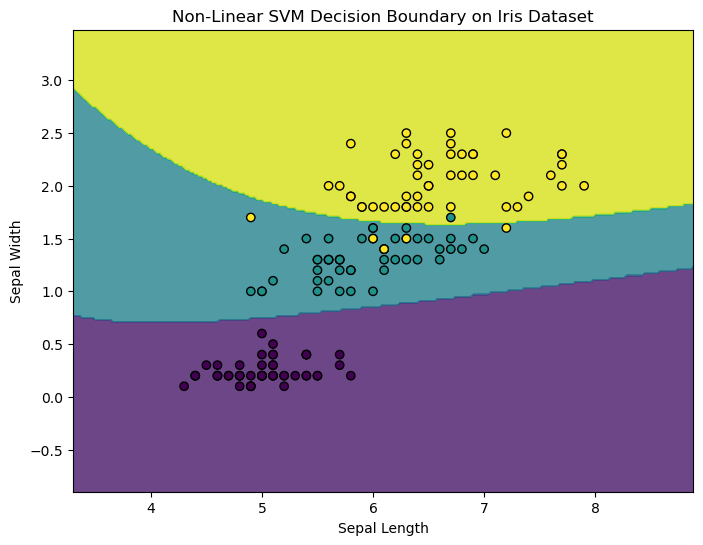

In [29]:
# Plot Decision Boundary and Data Points

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Non-Linear SVM Decision Boundary on Iris Dataset')
plt.show()